In [29]:
# from https://www.kaggle.com/code/keyadoshi/causal-inference
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Sid-darthvader/DoWhy-The-Causal-Story-Behind-Hotel-Booking-Cancellations/master/hotel_bookings.csv')

In [4]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
dataset.isnull().mean()

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
arrival_date_week_number          0.000000
arrival_date_day_of_month         0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
market_segment                    0.000000
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
agent      

In [7]:
dataset=dataset.drop('company', axis=1)

/tmp/ipykernel_618250/3790140340.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['agent'], kde=False, bins=50, hist_kws={"linewidth": 3, "alpha": 1, "color": "black"}, axlabel='agent fees')


<AxesSubplot:xlabel='agent fees'>

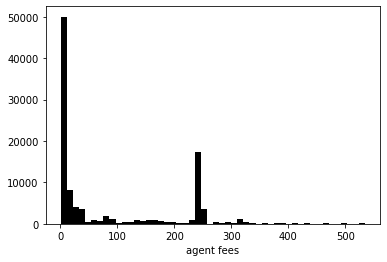

In [11]:
# random imputation
sns.distplot(dataset['agent'], kde=False, bins=50, hist_kws={"linewidth": 3, "alpha": 1, "color": "black"}, axlabel='agent fees')

In [12]:
dataset['agent'] = dataset['agent'].replace(np.nan, 0)

/tmp/ipykernel_618250/2681014746.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<AxesSubplot:xlabel='agent fees'>

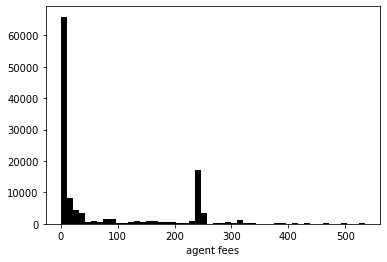

In [13]:
sns.distplot(
    dataset['agent'], kde=False, bins=50, 
    hist_kws={"linewidth": 3, "alpha": 1, "color": "black"}, 
    axlabel='agent fees')

In [14]:
dataset.dropna(inplace=True)

In [15]:
dataset.to_csv("data1.csv", index=False)

In [16]:
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [17]:
dataset['total_guests'] = dataset['adults'] + dataset['babies'] + dataset['children']

In [18]:
dataset.drop(['adults', 'babies', 'children'], axis=1, inplace=True)

In [20]:
dataset['total_days'] = dataset['stays_in_week_nights'] + dataset['stays_in_weekend_nights']
dataset.drop(['stays_in_week_nights', 'stays_in_weekend_nights'], axis=1, inplace=True)

In [22]:
dataset['is_canceled'] = np.where(dataset['is_canceled'] == 0, 'Booking not canceled', 'Booking canceled')
dataset['is_repeated_guest'] = np.where(dataset['is_repeated_guest'] == 0, "First time guest", "Repeated Guest")
dataset['previous_cancellations'] = np.where(dataset['previous_cancellations'] == 0, "No previous cancellation", "Previously Cancelled")

In [23]:
dataset["different_room_assigned"] = np.where(dataset["reserved_room_type"] == dataset["assigned_room_type"], 0, 1)
dataset.drop(['assigned_room_type', "reserved_room_type"], axis=1, inplace=True)

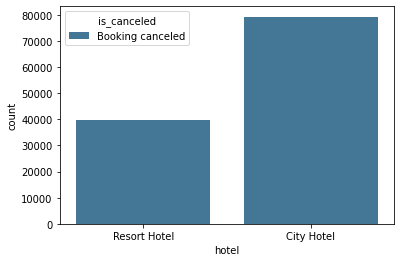

In [30]:
sns.countplot(x=dataset['hotel'], hue=dataset['is_canceled'], palette='mako')
plt.savefig('Type_of_hotel-is_canceled_1.png')

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  object 
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   meal                            118898 non-null  object 
 8   country                         118898 non-null  object 
 9   market_segment                  118898 non-null  object 
 10  distribution_channel            118898 non-null  object 
 11  is_repeated_guest               118898 non-null  object 
 12  previous_cancell

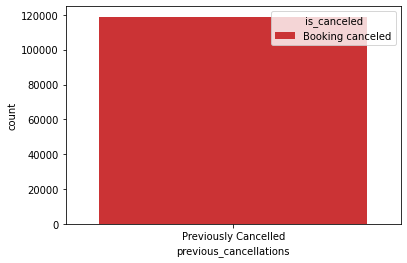

In [35]:
sns.countplot(x=dataset['previous_cancellations'], hue=dataset['is_canceled'], palette="Set1")
plt.savefig("prev_cancellation_is_cancelled_2.png")

In [36]:
dataset.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_days,different_room_assigned
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,104.311435,2016.157656,27.166555,15.800880,0.131634,0.221181,74.896264,2.330754,102.003243,0.061885,0.571683,1.970546,3.431042,0.123627
std,106.903309,0.707459,13.589971,8.780324,1.484672,0.652785,107.145761,17.630452,50.485862,0.244172,0.792678,0.721894,2.544938,0.329157
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,0.000000,7.000000,0.000000,70.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,0.000000,0.000000,9.000000,0.000000,95.000000,0.000000,0.000000,2.000000,3.000000,0.000000
75%,161.000000,2017.000000,38.000000,23.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,2.000000,4.000000,0.000000
max,737.000000,2017.000000,53.000000,31.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,57.000000,1.000000


In [3]:
"""do why part"""
import dowhy
from dowhy import CausalModel
from graphviz import Source
from IPython.display import Image, display
from causalgraphicalmodels import CausalGraphicalModel

ModuleNotFoundError: No module named 'causalgraphicalmodels'